[View in Colaboratory](https://colab.research.google.com/github/MicroprocessorX069/Mouse-Cursor-Detection/blob/master/Task_3_Cursor_Detection.ipynb)

Task 3 
# Cursor Detection






# Description and Procedure
Template matching is a technique in digital image processing for finding small parts of an image which match a template image [[1]](https://en.wikipedia.org/wiki/Template_matching)

Steps for template matching using **sum of squared differences**:

**Step 1**: Import the image and the template

**Step 2**: Apply Gaussian blur of size 3 x 3 to the image

**Step 3**: Convolute the image and template with laplacian kernel to calculate the laplacian transformed image and template.
Laplacian Kernel=[[0	,1,	0],[1,	-4	,1],[0,	1,	0]]

**Step 4**.: Now run the template all over the processed input image and calculate the sum of squared differences for each subset matrix of input image of size of template
Step 4.1: Locate the Minimum sum in the image.
Step 4.2: Value the matrix around the location with value 0 of size of template.

The white box on the image is the location of the template in the image.

Steps for template matching using **convolution**:
All steps are same as above except Step 4

**Step 4**.: Now convolute the template all over the processed input image.
Step 4.1: Locate the Maximum convolution in the image.
Step 4.2: Value the matrix around the location with value 0 of size of template.


# Defined Functions

Following are the functions defined and their workings:
1. **pad_image**(image, pad_x, pad_y)
Used to pad the input image along borders of the image with pad_x zeros on the right side and pad_y zeros on the right. Returns padded Image.
2. ** gkern** ( kernlen, nsig):
Returns the Gaussian kernel with size kernlen x kernlen, and sigma = nsig
The gaussian kernel is created by G(x)={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {x^{2}}{2\sigma ^{2}}}} [2]
3. **gaussian_blur**(input_image, sig)
Convoluting the Gaussian kernel with sigma sig on the input_image to generate a blurred image.
4. **negative**(input_image)
Creates a negative of the input image by subtracting each pixel value from 255.
5. ** linearSpatialFiltering**(inputImg, template)
Main template Matching function which checks the sum of squared differences or convolution between the template and each subset of the input image of the size of the template.
Returns the input_image with location of the template in the image as set of white pixels.
6. **convolution**(input_image,kernel)
Convolutes the input_image with the kernel.

In [0]:

def pad_image(image,pad_x,pad_y):
  image_x=len(image[0])
  image_y=len(image)
  padded_image=np.zeros((image_y+pad_y,image_x+pad_x))
  padded_image_x=len(padded_image[0])
  padded_image_y=len(padded_image)
  
  for i in range(image_y):
    for j in range(image_x):
      padded_image[i,j]=image[i,j]
  return(padded_image)

import scipy.stats as st
def gkern(kernlen=21, nsig=3):
    interval = (2*nsig+1.)/(kernlen)  
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel
#plt.imshow(gkern(21,10))

import numpy as np
def gaussian_blur(input_image,sig):
    kernel=gkern(3,sig)
    input_image=np.array(input_image)
    padded_input=np.pad(input_image,(int((len(kernel))/2),int((len(kernel))/2)),'constant')
    padded_input=np.array(padded_input)
    new_image=np.zeros((len(input_image),len(input_image[0])))
    for input_x in range(int((len(kernel))/2),(len(padded_input)-int((len(kernel))/2))):
      for input_y in range(int((len(kernel))/2),(len(padded_input[0])-int((len(kernel))/2))):
          #padded_input[input_x,input_y]=0
          '''for kernel_x in range(len(kernel)):
             for kernel_y in range(len(kernel[0])):
                  padded_input[input_x,input_y]=padded_input[input_x,input_y]+padded_input[input_x+kernel_x-int((len(kernel))/2), input_y+kernel_y-int((len(kernel))/2)]*kernel[kernel_x,kernel_y]
                  new_image[input_x-int((len(kernel))/2),input_y-int((len(kernel))/2)]=padded_input[input_x,input_y]
                  '''
          padded_input_slice=padded_input[input_x-int((len(kernel))/2):input_x+int((len(kernel))/2)+1,input_y-int((len(kernel[0]))/2):input_y+int((len(kernel[0]))/2)+1]
          product_mat=np.multiply(padded_input_slice,kernel)
          new_image[input_x-int((len(kernel))/2),input_y-int((len(kernel))/2)]=np.sum(product_mat)       
                 #new_image[input_x-int((len(kernel))/2),input_y-int((len(kernel))/2)]=padded_input[input_x,input_y]+padded_input[input_x+kernel_x-int((len(kernel))/2), input_y+kernel_y-int((len(kernel))/2)]*kernel[kernel_x,kernel_y]
    return(new_image)   

def negative(input_image):
  #new_image2=np.zeros((len(input_image),len(input_image[0])))
  for x in range(len(input_image)):
     for y in range(len(input_image[0])):
         input_image[x,y]=255-input_image[x,y]
  return(input_image)

import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook, tnrange, tqdm


def linearSpatialFiltering(inputImg, template):
  
  temp_2=np.power(template,2)
  testImg=inputImg
  #testImg=np.array([[0,0,0,0],[0,0,10,0],[0,0,10,0],[0,0,0,0]])
  
  temp_w=len(template[0])
  temp_h=len(template)
  temp_x2=int(temp_w/2)
  temp_y2=int(temp_h/2)
  img_w=len(testImg[0])
  img_h=len(testImg)
    
  #Padding test image depending on the size of template
  paddedTestImg=pad_image(testImg,temp_w,temp_h)
    
  test_img_test=np.zeros(testImg.shape)
  test_img_test2=np.zeros(testImg.shape)
  for img_i in (range(img_h-temp_h)):
    for img_j in range(img_w-temp_w):
      
      paddedTestSlice=np.power(testImg[img_i:img_i+temp_h,img_j:img_j+temp_w],2)
      #sum=convolutionSimple(paddedTestSlice,temp_2)
      sum=np.sum(np.subtract(temp_2,paddedTestSlice))
      print(sum)
      test_img_test[img_i,img_j]=sum
  
  min_x,min_y=np.unravel_index(test_img_test.argmin(),test_img_test.shape)
  print(min_x,min_y)
  result=testImg[min_x-20:min_x+20,min_y-20:min_y+20]
  return(test_img_test)

def flip(matrix):
  new_matrix=np.zeros((matrix.shape))
  matrix=np.array(matrix)
  l=len(matrix)
  for i in range(l):
    for j in range(l):
      new_matrix[i,j]=matrix[l-i-1,l-j-1]
  return(new_matrix)

import numpy as np
def convolution(input_image,kernel):
    
    input_image=np.array(input_image)
    padded_input=np.pad(input_image,(int((len(kernel))/2),int((len(kernel))/2)),'constant')
    padded_input=np.array(padded_input)
    kernel=flip(np.array(kernel))
    new_image=np.zeros((len(input_image),len(input_image[0])))
    for input_x in range(int((len(kernel))/2),(len(padded_input)-int((len(kernel))/2))):
      for input_y in range(int((len(kernel))/2),(len(padded_input[0])-int((len(kernel))/2))):
          #padded_input[input_x,input_y]=0
          padded_input_slice=padded_input[input_x-int((len(kernel))/2):input_x+int((len(kernel))/2)+1,input_y-int((len(kernel[0]))/2):input_y+int((len(kernel[0]))/2)+1]
          product_mat=np.multiply(padded_input_slice,kernel)
          new_image[input_x-int((len(kernel))/2),input_y-int((len(kernel))/2)]=np.sum(product_mat)       
                 #new_image[input_x-int((len(kernel))/2),input_y-int((len(kernel))/2)]=padded_input[input_x,input_y]+padded_input[input_x+kernel_x-int((len(kernel))/2), input_y+kernel_y-int((len(kernel))/2)]*kernel[kernel_x,kernel_y]
    return(new_image)  
  
def convolutionSimple(mat1,mat2):
  #print(np.sum(np.multiply(mat1,mat2)))
  return(np.sum(np.multiply(mat1,mat2)))

# Template matching using Sum of squared differences

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
input_image=np.array(cv2.imread("pos_12.jpg",cv2.IMREAD_GRAYSCALE)) #make sure the path to the image is in String format
input_image=negative(input_image)
#input_image=input_image.astype(np.float32)
template= negative(np.array(cv2.imread("template.png",cv2.IMREAD_GRAYSCALE),dtype='int8'))
#template=template.astype(np.float32)

gaussian_blur_img=cv2.GaussianBlur(input_image,(3,3),0)
laplacian_kernel=[[0	,1,	0],[1,	-4	,1],[0,	1,	0]]
laplacian_transform_img=convolution(gaussian_blur_img,laplacian_kernel)
laplacian_transform_template=convolution(template,laplacian_kernel)
laplacian_transform_img=laplacian_transform_img.astype(np.float32)
laplacian_transform_template=laplacian_transform_template.astype(np.float32)

outputImg=linearSpatialFiltering(laplacian_transform_img,laplacian_transform_template)  
plt.imshow(outputImg)

# Direct Functions

180 658


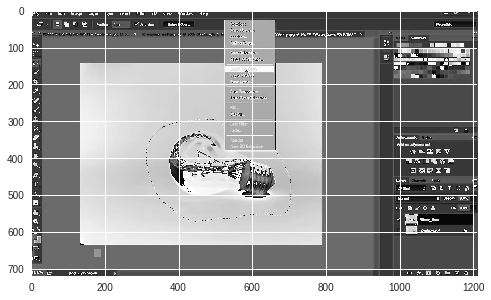

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

input_image=np.array(cv2.imread("pos_12.jpg",cv2.IMREAD_GRAYSCALE),dtype='int8') #make sure the path to the image is in String format
#input_image=negative(input_image)
input_image=input_image.astype(np.float32)
template= negative(np.array(cv2.imread("template.png",cv2.IMREAD_GRAYSCALE)))
template=template.astype(np.float32)
gaussian_blurred=cv2.GaussianBlur(input_image,(3,3),0)

laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

laplacian_transformed=convolution(gaussian_blurred,laplacian)
laplacian_transform_template=convolution(template,laplacian)

laplacian_transformed=laplacian_transformed.astype(np.float32)
laplacian_transform_template=laplacian_transform_template.astype(np.float32)

result1 = cv2.matchTemplate(laplacian_transformed,laplacian_transform_template,cv2.TM_CCOEFF_NORMED)
y1,x1 = np.unravel_index(result1.argmax(), result1.shape)
input_image_temp=input_image
input_image_temp[x1-10:x1+10,y1-10:y1+10]=0
plt.imshow(input_image_temp)
print(y1,x1)


